In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
# Read data with pandas library

data = pd.read_excel("dataset.xlsx")

In [3]:
# First 3 samples of the dataset

data.head(3)

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


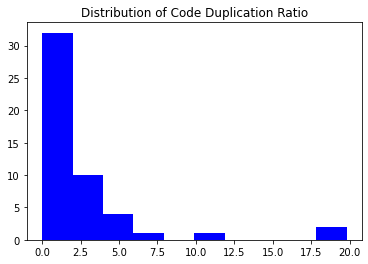

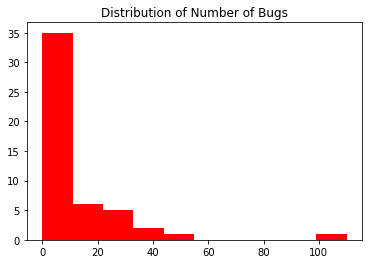

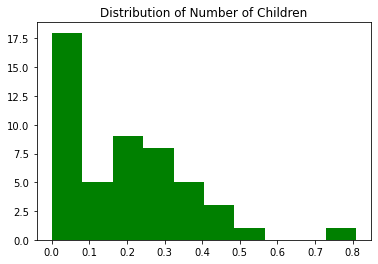

In [4]:
# Show the distribution of 3 metrics


def plotHist(columnName, colorName, longName):
    dataColumn = data[columnName]
    dataColumn.plot(kind='hist', color=colorName)
    plt.title('Distribution of {0}'.format(longName))
    plt.xlabel("")
    plt.ylabel("")
    plt.show()


plotHist('CDR', 'blue', 'Code Duplication Ratio')
plotHist('NOB', 'red', 'Number of Bugs')
plotHist('NOC', 'green', 'Number of Children')

These three histograms noticeably point out that the data is not normally distributed. Hence, Spearman Correlation Method will be chosen later on.

In [5]:
# Min-max scaler for all data


def max_min_normalizer(columnName):
    column_index = list(normalizedData.columns).index(columnName)
    min_value = min(normalizedData[columnName])
    max_value = max(normalizedData[columnName])
    for i in range(50):
        normalizedData.iloc[i, column_index] = (data.iloc[i, column_index] - min_value) / (max_value - min_value)


normalizedData = data.copy(deep=True)
for myCol in list(data.columns)[1:]:
    max_min_normalizer(myCol)


# First three samples of the normalized dataset

normalizedData.head(3)

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504


# Part1 (Statistical Correlation Analysis)

In [6]:
# Dropping the 'Name' column to prevent further complications

normalizedData.drop(['Name'], axis=1, inplace=True)
data_columns = normalizedData.columns

In [7]:
# Show the correlation matrix of all metrics

pairwiseCorrelation = normalizedData.corr(method='spearman')
pairwiseCorrelation

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [8]:
# P-values of Spearman Correlation Table

p_values = stats.spearmanr(normalizedData)[1]
pd.DataFrame(p_values, columns=data_columns, index=data_columns).round(4)

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


<AxesSubplot:title={'center':'Heatmap of the Correlation Matrix'}>

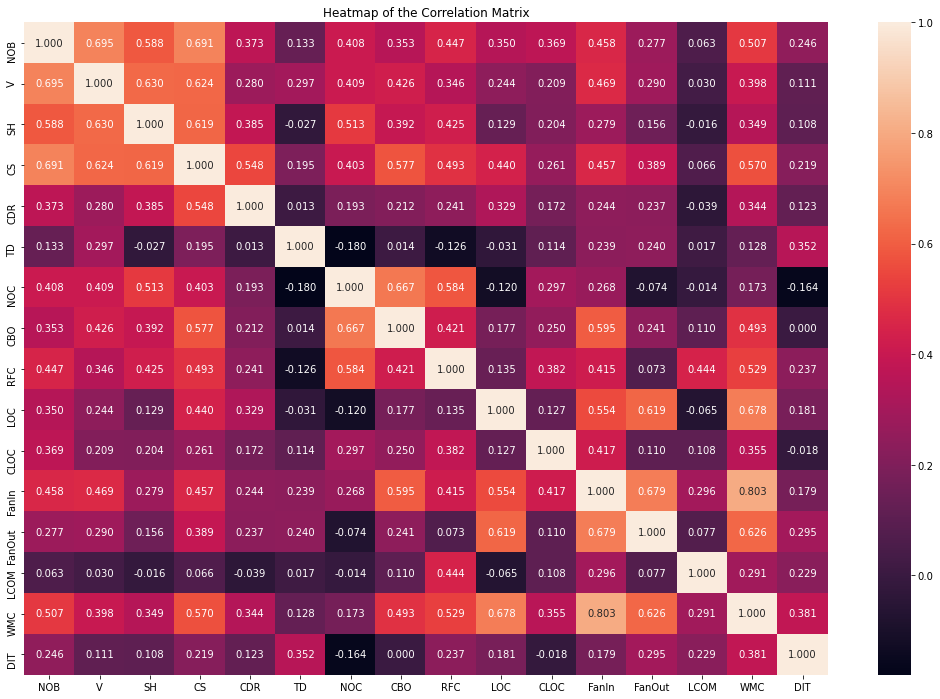

In [9]:
# If you want to see heatmap of the correlation matrix, you can launch code below:

plt.figure(figsize=(18,12))
plt.title('Heatmap of the Correlation Matrix')
sns.heatmap(pairwiseCorrelation, annot=True, fmt='.3f')

In [10]:
# Correlation between External Metrics & TD

normalizedData_external_and_TD = normalizedData[['NOB', 'V', 'SH', 'CS', 'CDR', 'TD']]
normalizedData_external_and_TD.corr(method='spearman')

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [11]:
# Correlation between Internal Metrics & TD

normalizedData_internal_and_TD = normalizedData[['NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT', 'CDR', 'TD']]
normalizedData_internal_and_TD.corr(method='spearman')

,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT,CDR,TD
NOC,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788,0.192707,-0.179659
CBO,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144,0.212007,0.013652
RFC,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368,0.240992,-0.126364
LOC,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072,0.328527,-0.031098
CLOC,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867,0.171773,0.114297
FanIn,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395,0.243709,0.239077
FanOut,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389,0.237237,0.240135
LCOM,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251,-0.038683,0.017159
WMC,0.173468,0.492616,0.529367,0.678224,0.355080,0.802910,0.626327,0.291312,1.000000,0.381028,0.343628,0.127638
DIT,-0.163788,0.000144,0.237368,0.181072,-0.017867,0.179395,0.295389,0.229251,0.381028,1.000000,0.123330,0.352010


# Part2 (ML Modelling)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [13]:
def plotGraph(y_test, y_pred, titlePart, tdType):
    plt.scatter(y_test, y_pred, c='b', label='Predicted Values')
    plt.plot(y_test, y_test, color='red', label='Original Values')
    plt.title('Accuracy of {0} Regressor (for {1})'.format(titlePart, tdType))
    plt.legend()
    plt.show()

Step 1: Split data into train and test sets

In [14]:
X = normalizedData.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
y = normalizedData.iloc[:, [4, 5]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

Step 2: Define the functions of 5 ML models

In [15]:
def linearRegression(X_train, y_train, X_test, y_test):
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)
    y_pred = linear_regression_model.predict(X_test)
    
    print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared Value:", r2_score(y_test, y_pred))
    return y_pred


def svrRegression(X_train, y_train, X_test, y_test, kernelType):
    support_vector_regression_model = SVR(kernel=kernelType)
    support_vector_regression_model.fit(X_train, y_train)
    y_pred = support_vector_regression_model.predict(X_test)
    
    print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared Value:", r2_score(y_test, y_pred))
    return y_pred


def decisionTreeRegression(X_train, y_train, X_test, y_test):
    decision_tree_regression_model = DecisionTreeRegressor(random_state=53)
    decision_tree_regression_model.fit(X_train, y_train)
    y_pred = decision_tree_regression_model.predict(X_test)
    
    print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared Value:", r2_score(y_test, y_pred))
    return y_pred


def randomDecTreeRegression(X_train, y_train, X_test, y_test):
    random_forest_regression_model = RandomForestRegressor(random_state=53)
    random_forest_regression_model.fit(X_train, y_train)
    y_pred = random_forest_regression_model.predict(X_test)
    
    print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared Value:", r2_score(y_test, y_pred))
    return y_pred


def mlpRegressor(X_train, y_train, X_test, y_test):
    multilayer_perceptron_regression_model = MLPRegressor(random_state=53)
    multilayer_perceptron_regression_model.fit(X_train, y_train)
    y_pred = multilayer_perceptron_regression_model.predict(X_test)
    
    print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared Value:", r2_score(y_test, y_pred))
    return y_pred

Step3: Show machine learning models that estimate Technical Debt using only internal metrics

In [16]:
internal_metrics = ['NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT']

Root Mean Squared Error: 0.2822820349754406
R-Squared Value: -0.25353936900603147


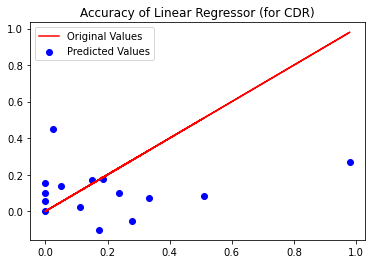

------------------------------------------------------
Root Mean Squared Error: 0.26506407767604284
R-Squared Value: -0.17296753046920688


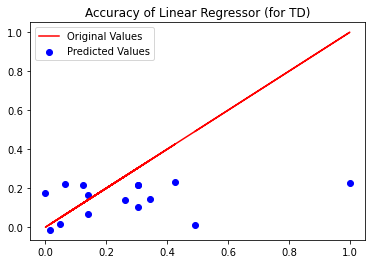

In [17]:
# Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error)

# Internal - CDR
y_pred = linearRegression(X_train[internal_metrics], y_train['CDR'], X_test[internal_metrics], y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Linear', 'CDR')

print("------------------------------------------------------")

# Internal - TD
y_pred = linearRegression(X_train[internal_metrics], y_train['TD'], X_test[internal_metrics], y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Linear', 'TD')

Root Mean Squared Error: 0.2670757664434762
R-Squared Value: -0.12212300389682551


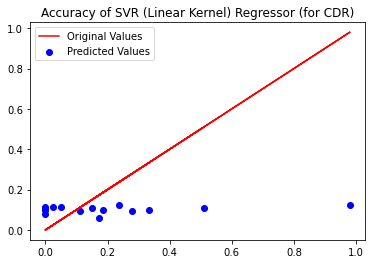

------------------------------------------------------
Root Mean Squared Error: 0.27207868349808145
R-Squared Value: -0.16455641994479642


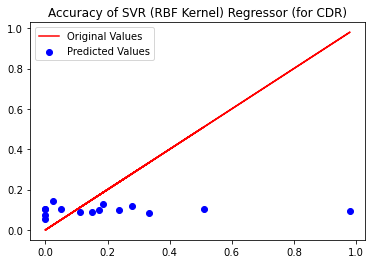

------------------------------------------------------
Root Mean Squared Error: 0.2846415332813679
R-Squared Value: -0.3526354995047578


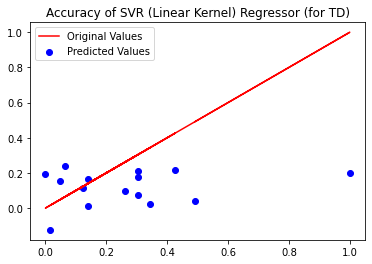

------------------------------------------------------
Root Mean Squared Error: 0.2539407417364148
R-Squared Value: -0.0765866953166634


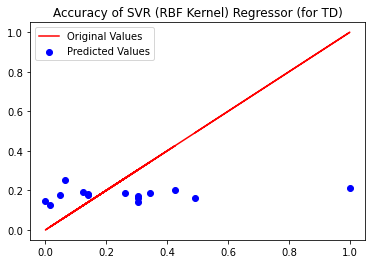

In [18]:
# Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error)

# Internal - CDR

# Linear Kernel
y_pred = svrRegression(X_train[internal_metrics], y_train['CDR'], X_test[internal_metrics], y_test['CDR'], 'linear')
plotGraph(y_test['CDR'], y_pred, 'SVR (Linear Kernel)', 'CDR')

print("------------------------------------------------------")

# RBF Kernel
y_pred = svrRegression(X_train[internal_metrics], y_train['CDR'], X_test[internal_metrics], y_test['CDR'], 'rbf')
plotGraph(y_test['CDR'], y_pred, 'SVR (RBF Kernel)', 'CDR')

print("------------------------------------------------------")

# Internal - TD

# Linear Kernel
y_pred = svrRegression(X_train[internal_metrics], y_train['TD'], X_test[internal_metrics], y_test['TD'], 'linear')
plotGraph(y_test['TD'], y_pred, 'SVR (Linear Kernel)', 'TD')

print("------------------------------------------------------")

# RBF Kernel
y_pred = svrRegression(X_train[internal_metrics], y_train['TD'], X_test[internal_metrics], y_test['TD'], 'rbf')
plotGraph(y_test['TD'], y_pred, 'SVR (RBF Kernel)', 'TD')

Root Mean Squared Error: 0.26700251782083956
R-Squared Value: -0.12150757783825572


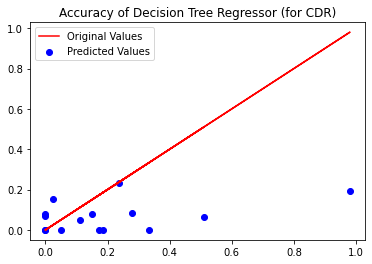

------------------------------------------------------
Root Mean Squared Error: 0.30086917595682483
R-Squared Value: -0.5112615531870346


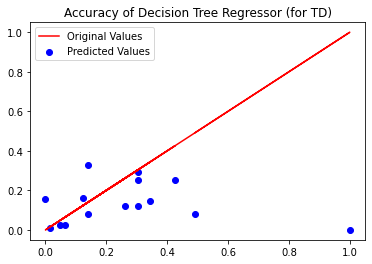

In [19]:
# Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error)

# Internal - CDR
y_pred = decisionTreeRegression(X_train[internal_metrics], y_train['CDR'], X_test[internal_metrics], y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Decision Tree', 'CDR')

print("------------------------------------------------------")

# Internal - TD
y_pred = decisionTreeRegression(X_train[internal_metrics], y_train['TD'], X_test[internal_metrics], y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Decision Tree', 'TD')

Root Mean Squared Error: 0.25847531504491733
R-Squared Value: -0.05101676969007363


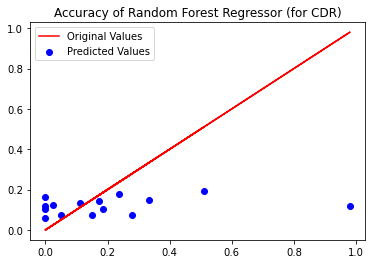

------------------------------------------------------
Root Mean Squared Error: 0.2668178569544247
R-Squared Value: -0.18854060689751417


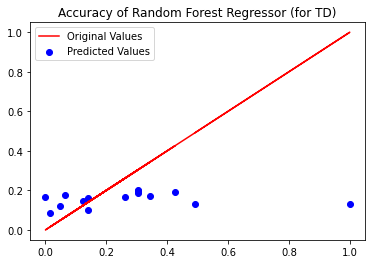

In [20]:
# Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error)

# Internal - CDR
y_pred = randomDecTreeRegression(X_train[internal_metrics], y_train['CDR'], X_test[internal_metrics], y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Random Forest', 'CDR')

print("------------------------------------------------------")

# Internal - TD
y_pred = randomDecTreeRegression(X_train[internal_metrics], y_train['TD'], X_test[internal_metrics], y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Random Forest', 'TD')

Root Mean Squared Error: 0.2789765014141509
R-Squared Value: -0.2243532714888421


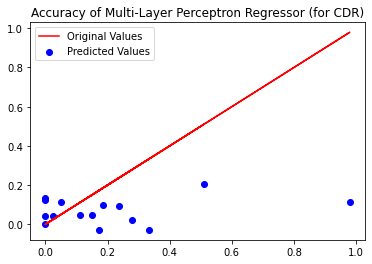

------------------------------------------------------
Root Mean Squared Error: 0.2984621365383263
R-Squared Value: -0.4871772319255998


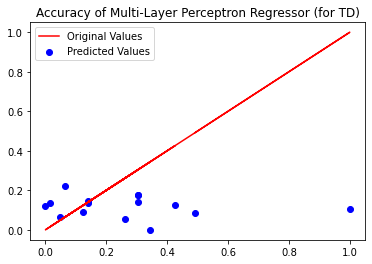

In [21]:
# Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error)

# Internal - CDR
y_pred = mlpRegressor(X_train[internal_metrics], y_train['CDR'], X_test[internal_metrics], y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Multi-Layer Perceptron', 'CDR')

print("------------------------------------------------------")

# Internal - TD
y_pred = mlpRegressor(X_train[internal_metrics], y_train['TD'], X_test[internal_metrics], y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Multi-Layer Perceptron', 'TD')

Step4: Show machine learning models that estimate Technical Debt using only external metrics

In [22]:
external_metrics = ['NOB', 'V', 'SH', 'CS']

Root Mean Squared Error: 0.2873300555429503
R-Squared Value: -0.29877407933861844


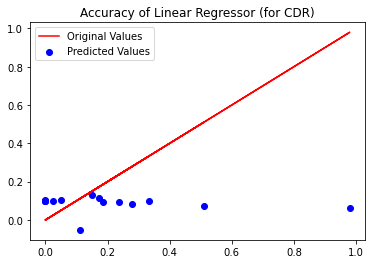

------------------------------------------------------
Root Mean Squared Error: 0.2929919249634493
R-Squared Value: -0.433162853421762


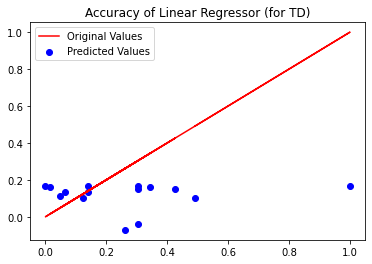

In [23]:
# Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error)

# External - CDR
y_pred = linearRegression(X_train[external_metrics], y_train['CDR'], X_test[external_metrics], y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Linear', 'CDR')

print("------------------------------------------------------")

# External - TD
y_pred = linearRegression(X_train[external_metrics], y_train['TD'], X_test[external_metrics], y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Linear', 'TD')

Root Mean Squared Error: 0.2645570517029422
R-Squared Value: -0.10105796501066222


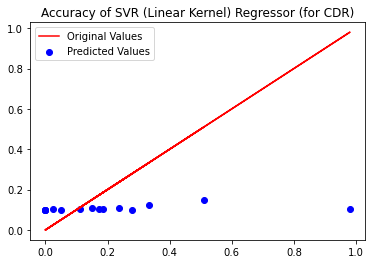

------------------------------------------------------
Root Mean Squared Error: 0.2592614897703499
R-Squared Value: -0.05742000726843277


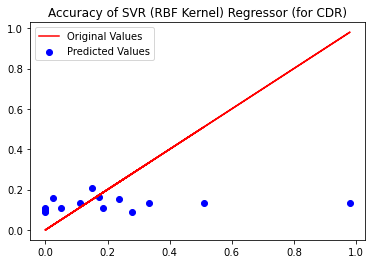

------------------------------------------------------
Root Mean Squared Error: 0.28087299055485854
R-Squared Value: -0.3170558678590276


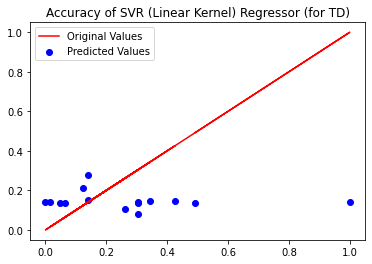

------------------------------------------------------
Root Mean Squared Error: 0.2949939533353097
R-Squared Value: -0.45281551449179935


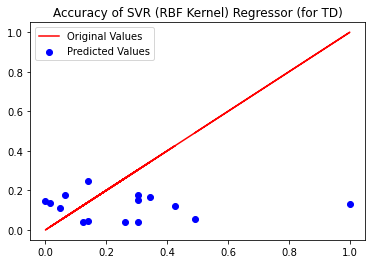

In [24]:
# Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error)

# External - CDR

# Linear Kernel
y_pred = svrRegression(X_train[external_metrics], y_train['CDR'], X_test[external_metrics], y_test['CDR'], 'linear')
plotGraph(y_test['CDR'], y_pred, 'SVR (Linear Kernel)', 'CDR')

print("------------------------------------------------------")

# RBF Kernel
y_pred = svrRegression(X_train[external_metrics], y_train['CDR'], X_test[external_metrics], y_test['CDR'], 'rbf')
plotGraph(y_test['CDR'], y_pred, 'SVR (RBF Kernel)', 'CDR')

print("------------------------------------------------------")

# External - TD

# Linear Kernel
y_pred = svrRegression(X_train[external_metrics], y_train['TD'], X_test[external_metrics], y_test['TD'], 'linear')
plotGraph(y_test['TD'], y_pred, 'SVR (Linear Kernel)', 'TD')

print("------------------------------------------------------")

# RBF Kernel
y_pred = svrRegression(X_train[external_metrics], y_train['TD'], X_test[external_metrics], y_test['TD'], 'rbf')
plotGraph(y_test['TD'], y_pred, 'SVR (RBF Kernel)', 'TD')

Root Mean Squared Error: 0.3086102422213462
R-Squared Value: -0.49827719657436775


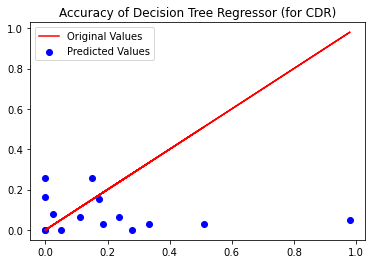

------------------------------------------------------
Root Mean Squared Error: 0.32257335573307827
R-Squared Value: -0.7371656181142008


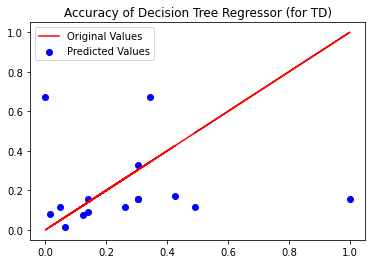

In [25]:
# Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error)

# External - CDR
y_pred = decisionTreeRegression(X_train[external_metrics], y_train['CDR'], X_test[external_metrics], y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Decision Tree', 'CDR')

print("------------------------------------------------------")

# External - TD
y_pred = decisionTreeRegression(X_train[external_metrics], y_train['TD'], X_test[external_metrics], y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Decision Tree', 'TD')

Root Mean Squared Error: 0.28338322249338543
R-Squared Value: -0.26333860652667807


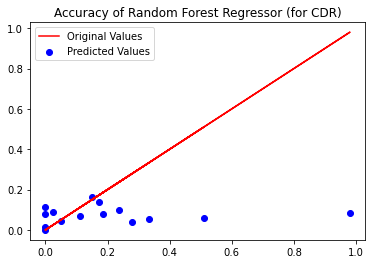

------------------------------------------------------
Root Mean Squared Error: 0.25933803739256533
R-Squared Value: -0.12283691062544255


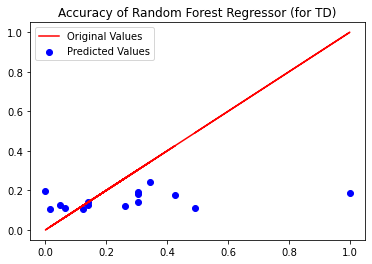

In [26]:
# Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error)

# External - CDR
y_pred = randomDecTreeRegression(X_train[external_metrics], y_train['CDR'], X_test[external_metrics], y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Random Forest', 'CDR')

print("------------------------------------------------------")

# External - TD
y_pred = randomDecTreeRegression(X_train[external_metrics], y_train['TD'], X_test[external_metrics], y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Random Forest', 'TD')

Root Mean Squared Error: 0.2730996195799929
R-Squared Value: -0.17331247765522573


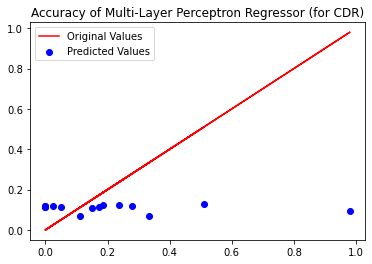

------------------------------------------------------
Root Mean Squared Error: 0.2670396014132049
R-Squared Value: -0.1905169499496393


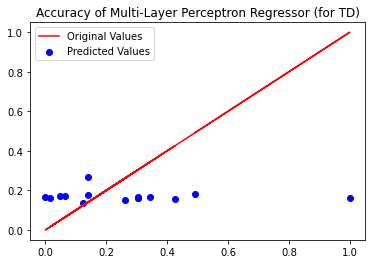

In [27]:
# Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error)

# External - CDR
y_pred = mlpRegressor(X_train[external_metrics], y_train['CDR'], X_test[external_metrics], y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Multi-Layer Perceptron', 'CDR')

print("------------------------------------------------------")

# External - TD
y_pred = mlpRegressor(X_train[external_metrics], y_train['TD'], X_test[external_metrics], y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Multi-Layer Perceptron', 'TD')

Step5: Show machine learning models that estimate Technical Debt using all (external and internal) metrics

Root Mean Squared Error: 0.43735647669844635
R-Squared Value: -2.009141591295799


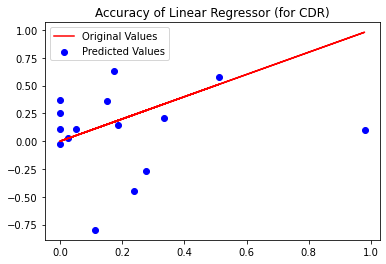

------------------------------------------------------
Root Mean Squared Error: 0.24518585195724782
R-Squared Value: -0.003633279100096809


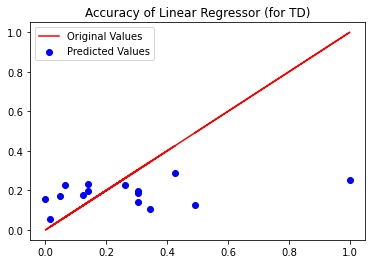

In [28]:
# Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error)

# External&Internal - CDR
y_pred = linearRegression(X_train, y_train['CDR'], X_test, y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Linear', 'CDR')

print("------------------------------------------------------")

# External&Internal - TD
y_pred = linearRegression(X_train, y_train['TD'], X_test, y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Linear', 'TD')

Root Mean Squared Error: 0.27161271934564984
R-Squared Value: -0.16057097814494936


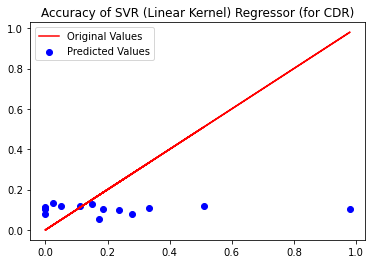

------------------------------------------------------
Root Mean Squared Error: 0.2806922153718834
R-Squared Value: -0.23945919966775864


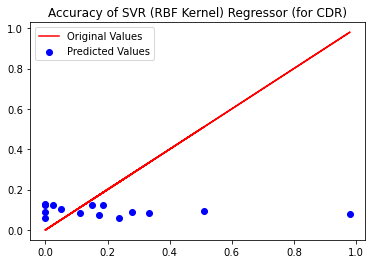

------------------------------------------------------
Root Mean Squared Error: 0.2857102425477754
R-Squared Value: -0.36281172246930393


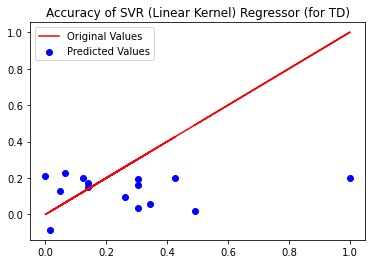

------------------------------------------------------
Root Mean Squared Error: 0.25636138138174125
R-Squared Value: -0.09720921648004155


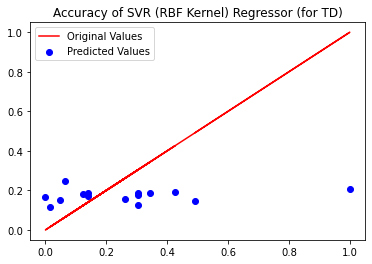

In [29]:
# Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error)

# External&Internal - CDR

# Linear Kernel
y_pred = svrRegression(X_train, y_train['CDR'], X_test, y_test['CDR'], 'linear')
plotGraph(y_test['CDR'], y_pred, 'SVR (Linear Kernel)', 'CDR')

print("------------------------------------------------------")

# RBF Kernel
y_pred = svrRegression(X_train, y_train['CDR'], X_test, y_test['CDR'], 'rbf')
plotGraph(y_test['CDR'], y_pred, 'SVR (RBF Kernel)', 'CDR')

print("------------------------------------------------------")

# External&Internal - TD

# Linear Kernel
y_pred = svrRegression(X_train, y_train['TD'], X_test, y_test['TD'], 'linear')
plotGraph(y_test['TD'], y_pred, 'SVR (Linear Kernel)', 'TD')

print("------------------------------------------------------")

# RBF Kernel
y_pred = svrRegression(X_train, y_train['TD'], X_test, y_test['TD'], 'rbf')
plotGraph(y_test['TD'], y_pred, 'SVR (RBF Kernel)', 'TD')

Root Mean Squared Error: 0.25886322456148736
R-Squared Value: -0.05417378556625985


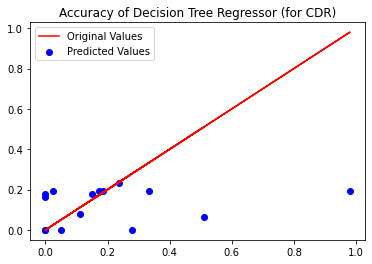

------------------------------------------------------
Root Mean Squared Error: 0.2742494419820825
R-Squared Value: -0.2556706581453083


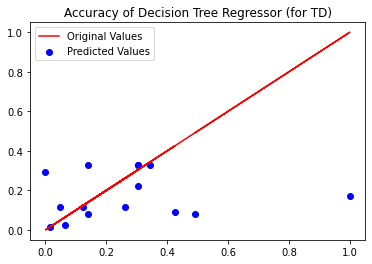

In [30]:
# Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error)

# External&Internal - CDR
y_pred = decisionTreeRegression(X_train, y_train['CDR'], X_test, y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Decision Tree', 'CDR')

print("------------------------------------------------------")

# External&Internal - TD
y_pred = decisionTreeRegression(X_train, y_train['TD'], X_test, y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Decision Tree', 'TD')

Root Mean Squared Error: 0.2502520360002964
R-Squared Value: 0.01479470371704672


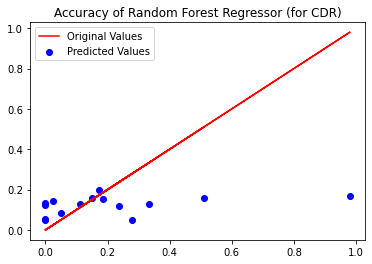

------------------------------------------------------
Root Mean Squared Error: 0.23808892103315416
R-Squared Value: 0.05362640457840229


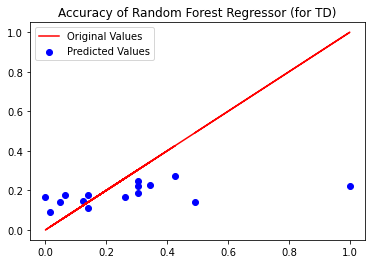

In [31]:
# Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error)

# External&Internal - CDR
y_pred = randomDecTreeRegression(X_train, y_train['CDR'], X_test, y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Random Forest', 'CDR')

print("------------------------------------------------------")

# External&Internal - TD
y_pred = randomDecTreeRegression(X_train, y_train['TD'], X_test, y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Random Forest', 'TD')

Root Mean Squared Error: 0.30644146309720954
R-Squared Value: -0.47729270505957055


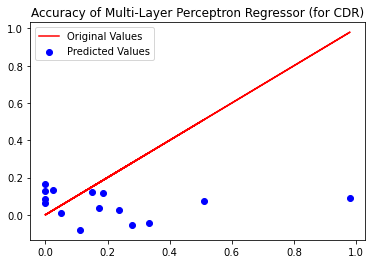

------------------------------------------------------
Root Mean Squared Error: 0.25593543701691623
R-Squared Value: -0.09356621979107316


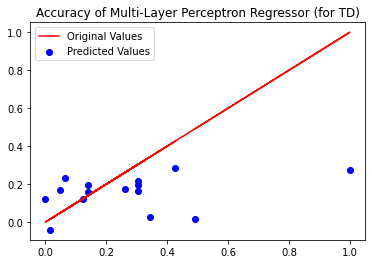

In [32]:
# Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error)

# External&Internal - CDR
y_pred = mlpRegressor(X_train, y_train['CDR'], X_test, y_test['CDR'])
plotGraph(y_test['CDR'], y_pred, 'Multi-Layer Perceptron', 'CDR')

print("------------------------------------------------------")

# External&Internal - TD
y_pred = mlpRegressor(X_train, y_train['TD'], X_test, y_test['TD'])
plotGraph(y_test['TD'], y_pred, 'Multi-Layer Perceptron', 'TD')